# Load the data

In [2]:
import pandas as pd

df = pd.read_csv("./IRIS.csv")

# Investigate the data

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
set(df.species)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

# Plot the data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


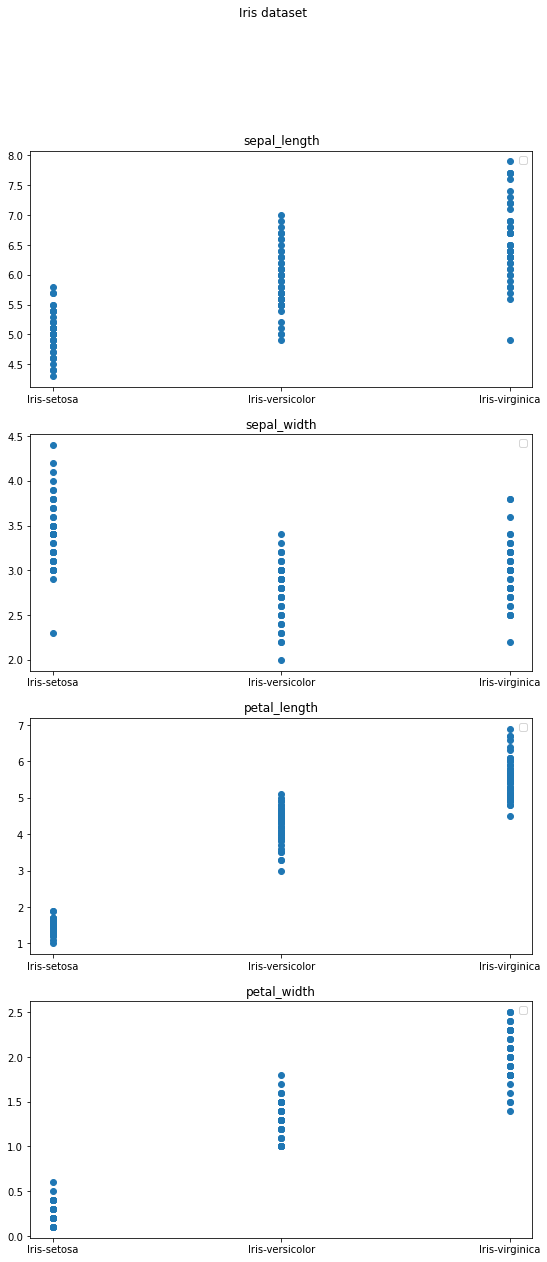

In [6]:
import matplotlib.pyplot as plt

keys = list(df)[:-1]
fig, axs = plt.subplots(len(keys), figsize=(9,20), gridspec_kw={"height_ratios": [1,1,1,1]})
fig.suptitle("Iris dataset")
for i,key in enumerate(keys):
    axs[i].scatter(df.species, df[key])
    axs[i].set_title(key)
    axs[i].legend()

# 2D-plot

virgin and setosa should be good candidates

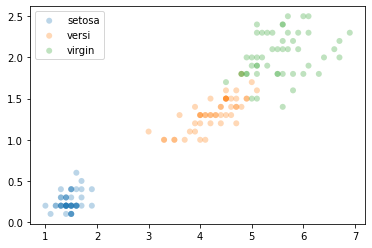

In [10]:
setosa = df[df.species == "Iris-setosa"]
versi = df[df.species == "Iris-versicolor"]
virgin = df[df.species == "Iris-virginica"]
plt.scatter(setosa.petal_length, setosa.petal_width, c="tab:blue", label="setosa", edgecolors="none", alpha=0.3)
plt.scatter(versi.petal_length, versi.petal_width, c="tab:orange", label="versi", edgecolors="none", alpha=0.3)
plt.scatter(virgin.petal_length, virgin.petal_width, c="tab:green", label="virgin", edgecolors="none", alpha=0.3)
plt.legend()

# Prep the data for training

In [12]:
import numpy as np

x = df.loc[:, df.columns!="species"].values.tolist()
x = np.asarray(x)

y = df.species.tolist()

# convert label to -1 for one class, and 1 to the other
# we're treating two classes as one here for simplicity
y = [-1 if v == "Iris-setosa" else 1 for v in y]
y = np.asarray(y)

# preview
print(x[0:3], y[0:3])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [-1 -1 -1]


In [13]:
from sklearn.model_selection import train_test_split
x_train, \
x_test, \
y_train, \
y_test = train_test_split(
    x,
    y,
    test_size=0.3, # 70% training and 30% test
    random_state=109,
    shuffle=True,
)

# Perceptron algorithm

In [162]:
from typing import Tuple

def linear_separation_iterate(
    weights: np.ndarray,
    x: np.ndarray,
    y: np.ndarray
) -> Tuple[np.ndarray, int]:
    # create augmented vectors from data to create bias
    x_biased = np.c_[x, np.ones(x.shape[0])]

    # set iteration limit
    max_iter = 1000
    for epoch in range(max_iter):
        # Score the current estimate of the weight vector
        missed = 0

        for sample, label in zip(x_biased, y):
            u = np.matmul(weights, sample)
            # print(u, label)
            if (u > 0) and label < 0:
                weights = weights - sample # optionally multiply by 0<=n<=1 to configure learning rate
                missed += 1
            elif u < 0 and label > 0:
                weights = weights + sample
                missed += 1
        
        # Stop if the current estimate has converged
        if missed == 0:
            print("converged!")
            break

    # Final weight is the current estimate
    return weights, epoch

# Train

In [163]:
weights, epochs = linear_separation_iterate(
    np.random.normal(size=(x_train.shape[1]+1)),
    x_train,
    y_train
)
print(f"Weights acquired after {epochs} epochs.")

converged!
Weights acquired after 1 epochs.


# Test

In [165]:
correct = 0
for label, sample in zip(y_test, x_test):
    if np.sign(np.matmul(sample, weights[:-1]) + weights[-1]) == label:
        correct += 1
print(f"Got {correct}/{len(x_test)} correct")

Got 45/45 correct
